# **Human Trafficking Case Study** 
<img src="https://static.wixstatic.com/media/854ff1_b8b778c28cae41198c03d9058617f0cc~mv2.png/v1/fill/w_529,h_937,al_c,q_90,enc_auto/854ff1_b8b778c28cae41198c03d9058617f0cc~mv2.png" width="300px">

- **UNODC**: (`United Nations Office on Drugs and Crime`)
- **CDE**: (`Crime Data Explorer`) 

In [116]:
import pandas as pd 
import numpy as np 
import warnings
import os 

import matplotlib.pyplot as plt 
import seaborn as sns 

from matplotlib.colors import ListedColormap

from typing import List, Dict 
warnings.filterwarnings("ignore")
pd.options.display.max_colwidth = 150 
pd.options.display.max_columns = 200 
plt.style.use("ggplot")

DATASET_PATH: str = os.path.join( os.getcwd(), "datasets/HumanTrafficking/")

## **UNODC Datasets**
- `CodeBook`: https://dataunodc.un.org/sites/dataunodc.un.org/files/metadata_trafficking_in_persons.pdf
1. **Detected trafficking victims**: Number of persons identified by national authorities as having experienced the “recruitment,
transportation, transfer, harbouring or receipt of persons, by means of the threat or use of force or
other forms of coercion, of abduction, of fraud, of deception, of the abuse of power or of a position
of vulnerability or of the giving or receiving of payments or benefits to achieve the consent of a
person having control over another person, for the purpose of exploitation. Exploitation shall
include, at minimum, the exploitation of the prostitution of others or other forms of sexual exploitation, forced labour or services, slavery or practices similar to slavery, servitude or the
removal of organs.” An individual may experience various types of exploitation in one trafficking event. For example, in
the case of forced marriage, it is common for women to endure sexual and domestic exploitation, or
forced labour.
2. **Offences of trafficking in persons**: Number of offences of trafficking in persons reported in a given year in a given country.
3. **Persons brought into formal contact**: Number of persons brought into contact, suspected, arrested, investigated or cautioned for
trafficking in persons and related offenses in a given year.
4. **Persons prosecuted**: Number of persons prosecuted for trafficking in persons and related offenses in a given year.
5. **Persons convicted**: Persons found guilty by any legal body authorized to pronounce a conviction
under national criminal law, whether or not the conviction was later upheld. Persons receiving a
sentence after plea-bargaining, or in an abbreviated court procedure, should be counted as persons
convicted.

In [170]:
htf: 'DataFrame' = pd.read_excel( os.path.join(DATASET_PATH, 'data_glotip.xlsx') )
columns: List[str]  = htf.iloc[1].tolist()
htf = htf.iloc[2:]
htf.columns = columns
htf['Value' ] = htf['txtVALUE'].replace({"<5": "4"}).apply(lambda row: row.replace(",", "") ).astype(int)
country_origins: List[str] = htf.query("Indicator == 'Detected trafficking victims' ").groupby('Country')['Value'].sum().sort_values(ascending=False).head(10).index.tolist() 

htf.head() 

,Iso3_code,Country,Region,Subregion,Indicator,Dimension,Category,Sex,Age,Year,Unit of measurement,txtVALUE,Source,Value
2,ABW,Aruba,Americas,Latin America and the Caribbean,Detected trafficking victims,by country of repatriation,Ukraine,Total,Total,2010,Counts,<5,GLOTIP,4
3,AFG,Afghanistan,Asia,Southern Asia,Detected trafficking victims,by country of repatriation,Abroad,Total,Total,2003,Counts,<5,GLOTIP,4
4,AFG,Afghanistan,Asia,Southern Asia,Detected trafficking victims,by country of repatriation,Abroad,Total,Total,2008,Counts,<5,GLOTIP,4
5,AFG,Afghanistan,Asia,Southern Asia,Offences of trafficking in persons,Total,Total,Total,Total,2013,Counts,103,GLOTIP,103
6,AFG,Afghanistan,Asia,Southern Asia,Persons brought into formal contact,Total,Total,Total,Total,2013,Counts,167,GLOTIP,167


## **Boxplot**: Human Trafficking Indicators by `Top 10 Country`

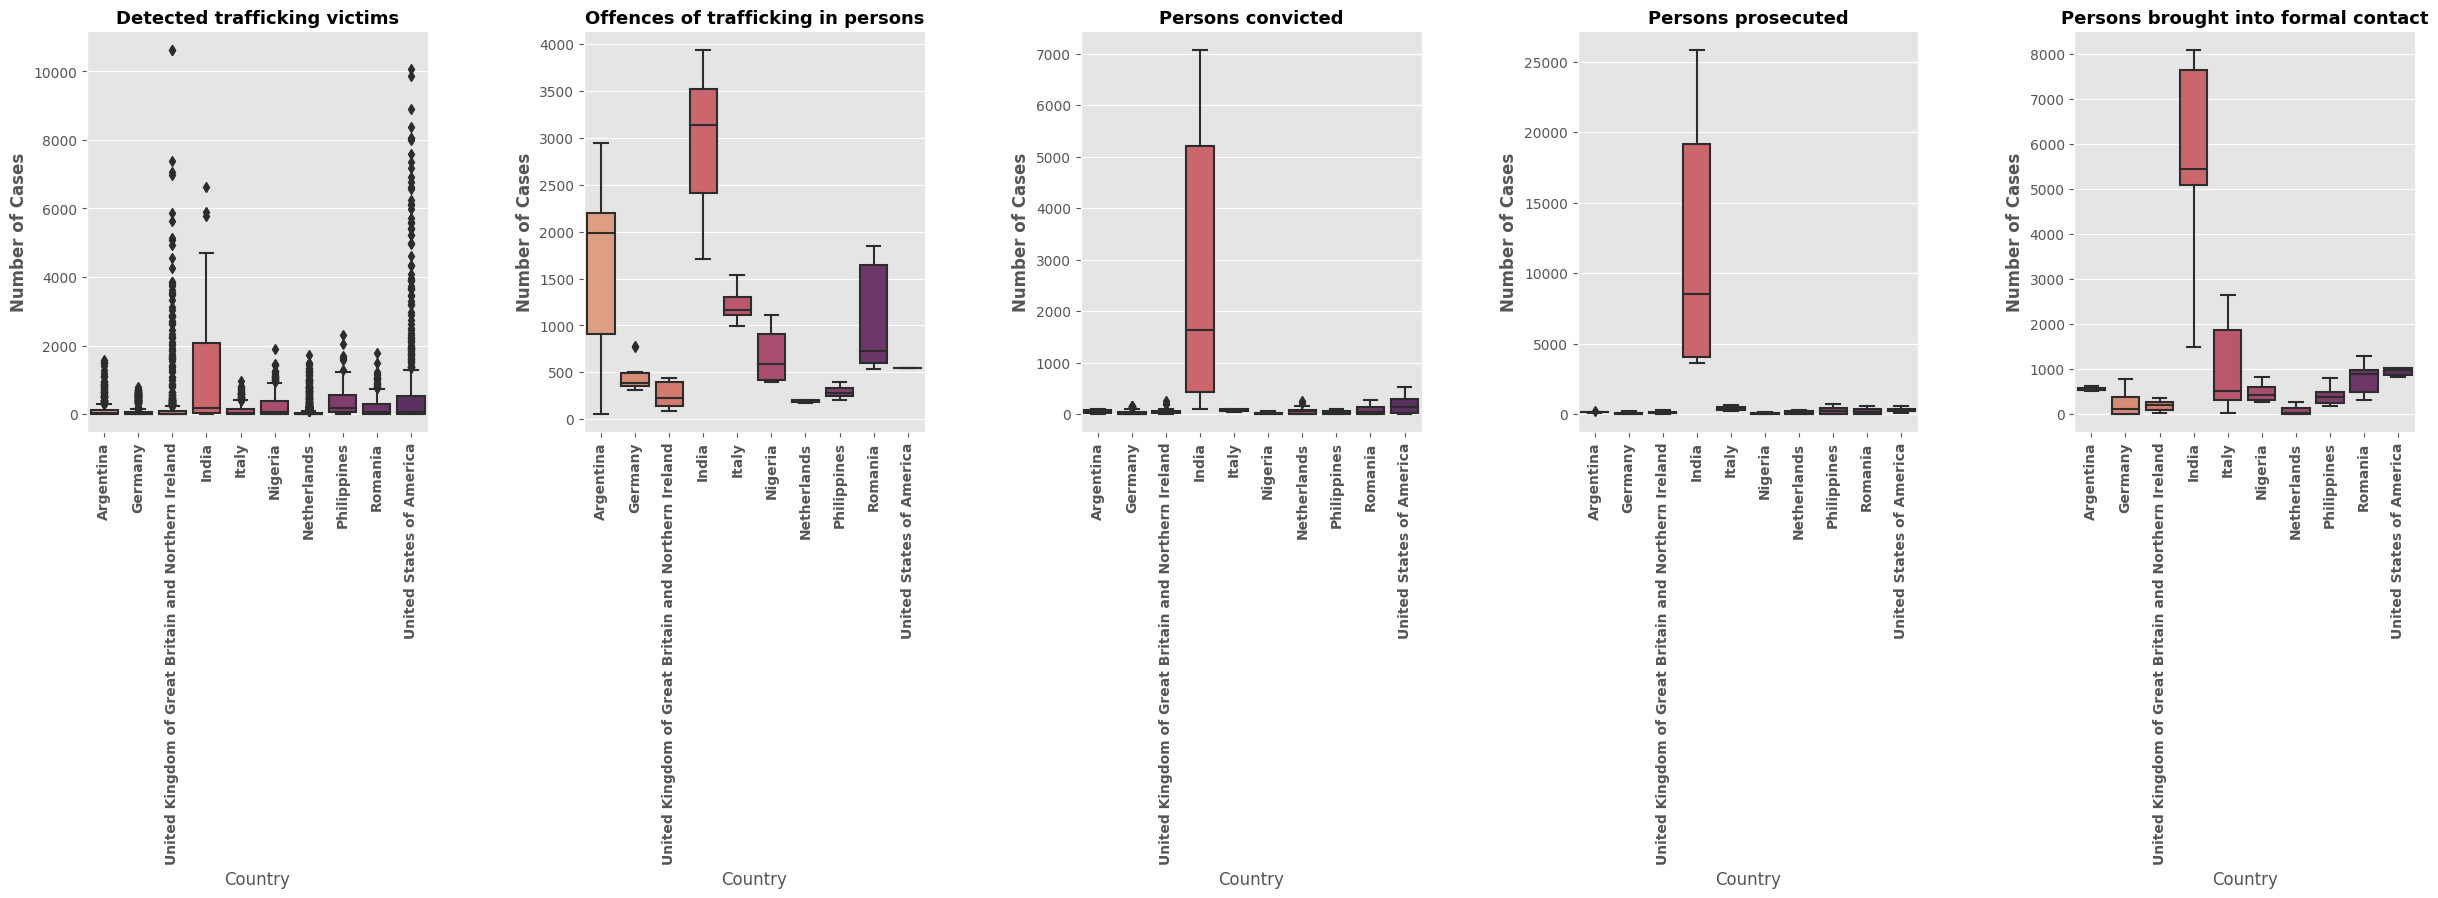

In [206]:
axs = sns.catplot(data=htf[htf['Country'].isin(country_origins)], col='Indicator', x='Country', y='Value', kind='box', sharey=False, palette='flare')
for ax in axs.axes.ravel():
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontweight='bold')
    ax.set_ylabel("Number of Cases", fontweight='bold' )
    ax.set_title(ax.get_title().replace("Indicator = ", "").strip(), fontweight='bold', fontsize=13 )
    
axs.tight_layout() 

## **Distribution of Number of Trafficking Victims**

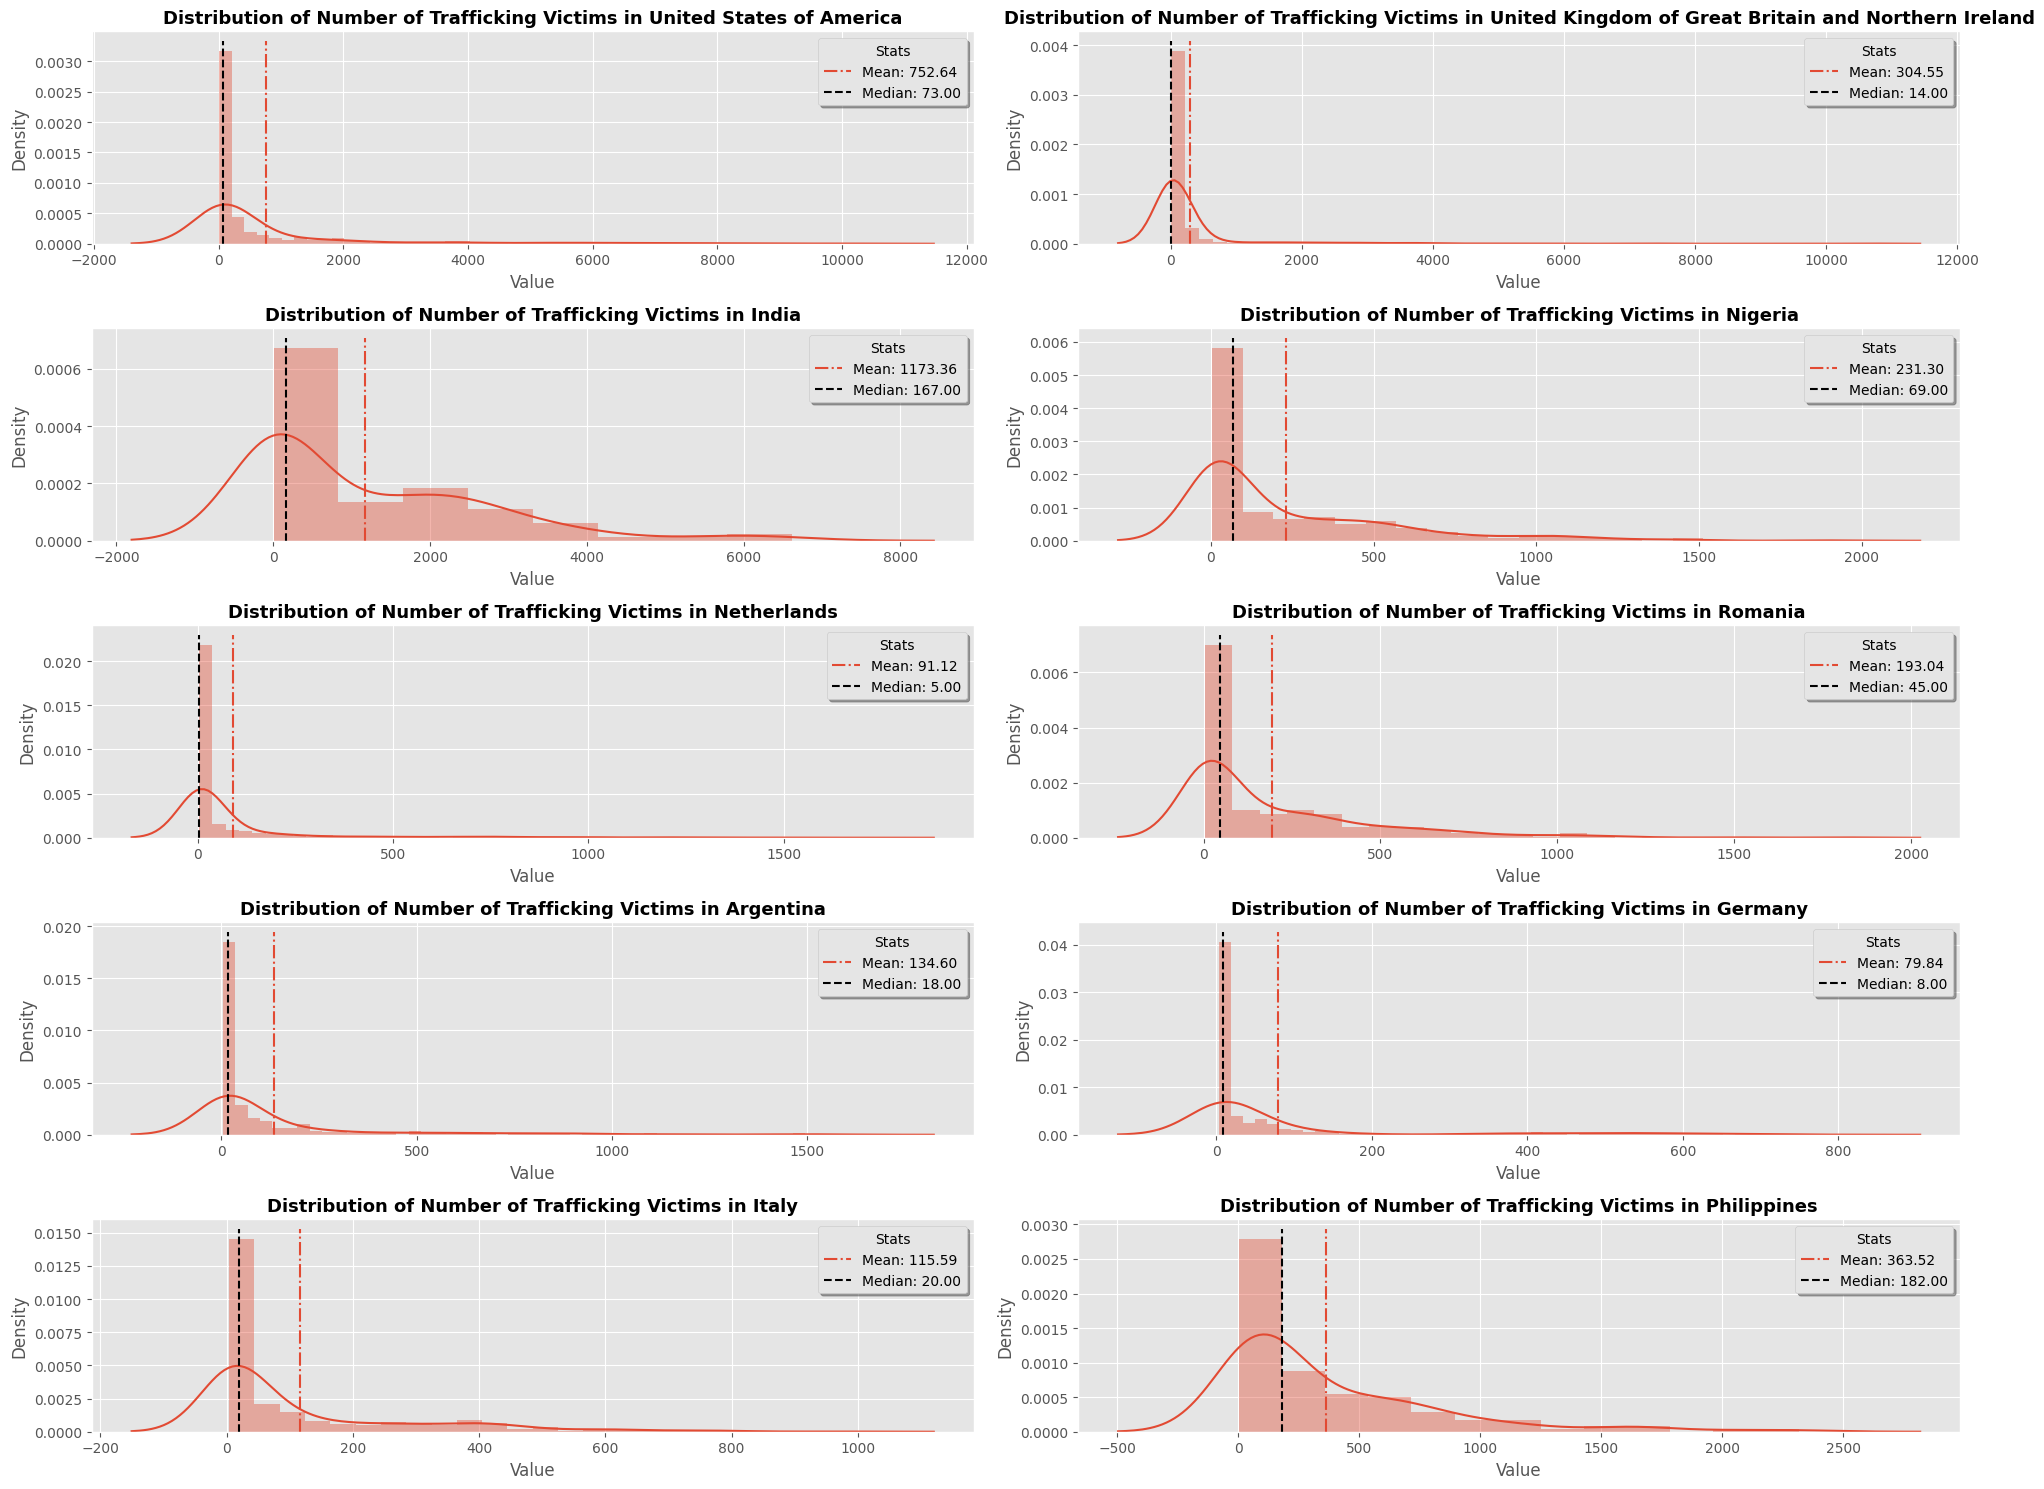

In [215]:
fig = plt.figure(figsize=(20,15)) 

for index,country in enumerate(country_origins, 1):
    ax = fig.add_subplot(5,2,index)
    df: 'Series' = htf.query(f"Country == '{country}' and Indicator == 'Detected trafficking victims'  ")['Value']
    sns.distplot( df, ax=ax )
    
    ax.set_title("Distribution of Number of Trafficking Victims in %s" % (country), fontweight='bold', fontsize=13)
    mean: float = df.mean() 
    median: float = df.median() 
    ymin,ymax = ax.get_ylim() 

    ax.vlines(mean, ymin=ymin, ymax=ymax, label=f"Mean: {mean:.2f}", linestyle="-.")
    ax.vlines(median, ymin=ymin, ymax=ymax, label=f"Median: {median:.2f}", linestyle="--", color='black')
    ax.legend(title="Stats", fancybox=True, shadow=True) 
    
plt.tight_layout()

In [217]:
# Total Number of Trafficking Victims By Country, Years 
indicators: List[str] = htf['Indicator'].unique().tolist() 

## **Number of Trafficking Victims By Country**

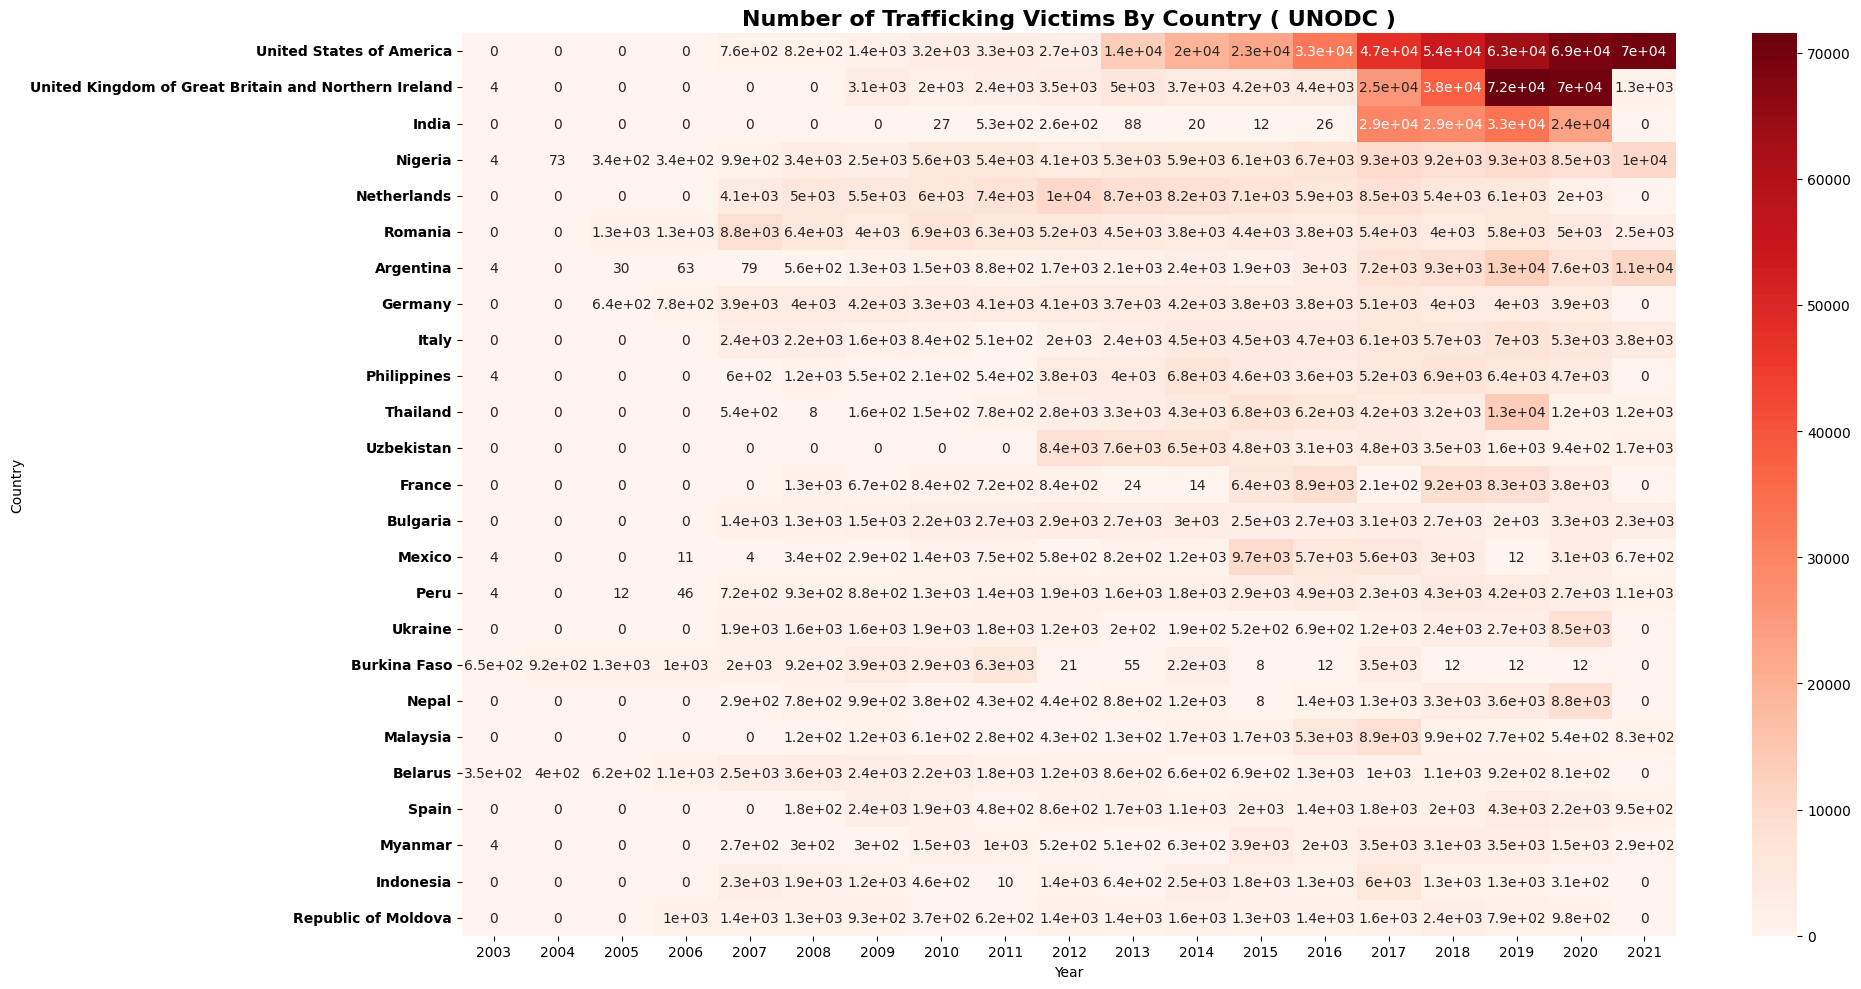

In [153]:
fig = plt.figure(figsize=(20,10)) 
ax = fig.add_subplot() 
sns.heatmap(htf.query("Indicator == 'Detected trafficking victims' ").groupby(['Year', 'Country'])['Value'].sum().unstack("Year").replace({np.nan:0.0}).loc[country_origins],
            ax=ax, 
            cmap=ListedColormap(sns.color_palette(palette='Reds', n_colors=100)), 
            annot=True
           )  # UNODC 

ax.set_title("Number of Trafficking Victims By Country ( UNODC )" , fontweight='bold', fontsize=16)
ax.set_yticklabels(ax.get_yticklabels(), fontweight='bold')
plt.tight_layout() 

## **Additional Information** 
- **Note**: `Languages`, `Religions`

In [109]:
additinal_info: 'DataFrame' = pd.read_csv(os.path.join(DATASET_PATH, "AllCountries.csv") )
country_info: 'DataFrame' = pd.DataFrame(additinal_info.index.tolist()[:-14][1:], columns=additinal_info.index.tolist()[:-14][0] )
country_info.head()

,ROG3,Ctry,PoplPeoples,CntPeoples,CntPeoplesLR,PoplPeoplesLR,JPScaleCtry,ROL3OfficialLanguage,OfficialLang,RLG3Primary,ReligionPrimary,PercentChristianity,PercentEvangelical,10_40Window,ROG2,Continent,RegionCode,RegionName,PercentUrbanized,LiteracyRate,ISO3,Population
0,AF,Afghanistan,42135000,70,68,42133000,1,pbt,"Pashto, Southern",6,Islam,0.01717568505688,0.014293101193637,Y,ASI,Asia,5,"Asia, Central",27,43,AFG,42240000
1,AL,Albania,2800000,15,3,39000,2,aln,"Albanian, Gheg",6,Islam,33.677355517469,0.61188788975755,Y,EUR,Europe,9,"Europe, Eastern and Eurasia",64,98,ALB,2832000
2,AG,Algeria,45521000,38,34,45487000,1,arb,"Arabic, Standard",6,Islam,0.076112587236723,0.045811593588587,Y,AFR,Africa,6,"Africa, North and Middle East",75,81,DZA,45606000
3,AQ,American Samoa,43000,9,1,800,5,smo,Samoan,1,Christianity,95.422429497083,25.196447606216,N,SOP,Oceania,1,Australia and Pacific,87,97,ASM,44000
4,AN,Andorra,79000,10,2,1200,3,cat,Catalan,1,Christianity,90.595400299926,1.364684693558,N,EUR,Europe,10,"Europe, Western",88,100,AND,80000


In [219]:
country_info.groupby(['Ctry','ReligionPrimary']).size().unstack('ReligionPrimary').replace({np.nan:0.0}).head(25)

ReligionPrimary,Buddhism,Christianity,Ethnic Religions,Hinduism,Islam,Non-Religious
Ctry,,,,,,
Afghanistan,0.0,0.0,0.0,0.0,1.0,0.0
Albania,0.0,0.0,0.0,0.0,1.0,0.0
Algeria,0.0,0.0,0.0,0.0,1.0,0.0
American Samoa,0.0,1.0,0.0,0.0,0.0,0.0
Andorra,0.0,1.0,0.0,0.0,0.0,0.0
Angola,0.0,1.0,0.0,0.0,0.0,0.0
Anguilla,0.0,1.0,0.0,0.0,0.0,0.0
Antigua and Barbuda,0.0,1.0,0.0,0.0,0.0,0.0
Argentina,0.0,1.0,0.0,0.0,0.0,0.0


## **CDE** 
- `CodeBook`

In [48]:
pd.DataFrame(list(map(lambda item: (item.split("–")[0].strip(), item.split("–")[1].strip()), filter(lambda item: len(item) > 0  , open(os.path.join( DATASET_PATH, "HumanTraffickingCodeBook.txt") ,"r" ).read().split("\n")[1:] ))), columns=['Columns', 'Description'])

,Columns,Description
0,DATA_YEAR,The year in which the incident occurred.
1,ORI,ORIGINATING AGENCY IDENTIFIER (ORI) - This identifies the agency in which the offense occurred.
2,PUB_AGENCY_NAME,Agency name as it appears in FBI UCR Publications.
3,PUB_AGENCY_UNIT,The specific unit name for which a Publication Agency report UCR data as.
4,AGENCY_TYPE_NAME,"Type of agency that reports UCR data (city/county/federal agency, etc)."
5,STATE_ABBR,This is the state abbreviation.
6,STATE_NAME,Full name of the state.
7,DIVISION_NAME,The geographic division in which the agency is located.
8,COUNTY_NAME,The name of the county within the state.
9,REGION_NAME,Geographic region in which the agency is located.


- **Load Dataset**

In [49]:
cde_df: 'DataFrame' = pd.read_csv( os.path.join(DATASET_PATH, "HT_2013_2022.csv") ) # US Cases 
cde_df.head()

,DATA_YEAR,ORI,PUB_AGENCY_NAME,PUB_AGENCY_UNIT,AGENCY_TYPE_NAME,STATE_ABBR,STATE_NAME,DIVISION_NAME,COUNTY_NAME,REGION_NAME,POPULATION_GROUP_CODE,POPULATION_GROUP_DESC,OFFENSE_SUBCAT_ID,OFFENSE_NAME,OFFENSE_SUBCAT_NAME,ACTUAL_COUNT,UNFOUNDED_COUNT,CLEARED_COUNT,JUVENILE_CLEARED_COUNT
0,2013,MO0950000,St. Louis County Police Department,NaN,County,MO,Missouri,West North Central,ST LOUIS,Midwest,9A,"MSA counties 100,000 or over",HTCSA,Human Trafficking,Commercial Sex Acts,6,0.0,6,0
1,2013,OH0020000,Allen,NaN,County,OH,Ohio,East North Central,ALLEN,Midwest,9C,"MSA counties from 10,000 thru 24,999",HTCSA,Human Trafficking,Commercial Sex Acts,1,0.0,1,0
2,2013,OH0020000,Allen,NaN,County,OH,Ohio,East North Central,ALLEN,Midwest,9C,"MSA counties from 10,000 thru 24,999",HTIS,Human Trafficking,Involuntary Servitude,1,0.0,0,0
3,2013,TN0320100,Morristown,NaN,City,TN,Tennessee,East South Central,"HAMBLEN, JEFFERSON",South,4,"Cities from 25,000 thru 49,999",HTCSA,Human Trafficking,Commercial Sex Acts,1,0.0,1,0
4,2013,TNMPD0000,Memphis,NaN,City,TN,Tennessee,East South Central,SHELBY,South,1B,"Cities from 500,000 thru 999,999",HTCSA,Human Trafficking,Commercial Sex Acts,3,0.0,2,0


In [54]:
cde_df.groupby(['OFFENSE_SUBCAT_NAME', 'DATA_YEAR'])['ACTUAL_COUNT'].sum().unstack('DATA_YEAR') # Total number of Human Trafficking reported to UCR 

DATA_YEAR,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
OFFENSE_SUBCAT_NAME,,,,,,,,,,
Commercial Sex Acts,13,320,589,1052,1094,1308,1795,1999,2003,2181
Involuntary Servitude,1,145,208,188,237,165,327,395,487,618


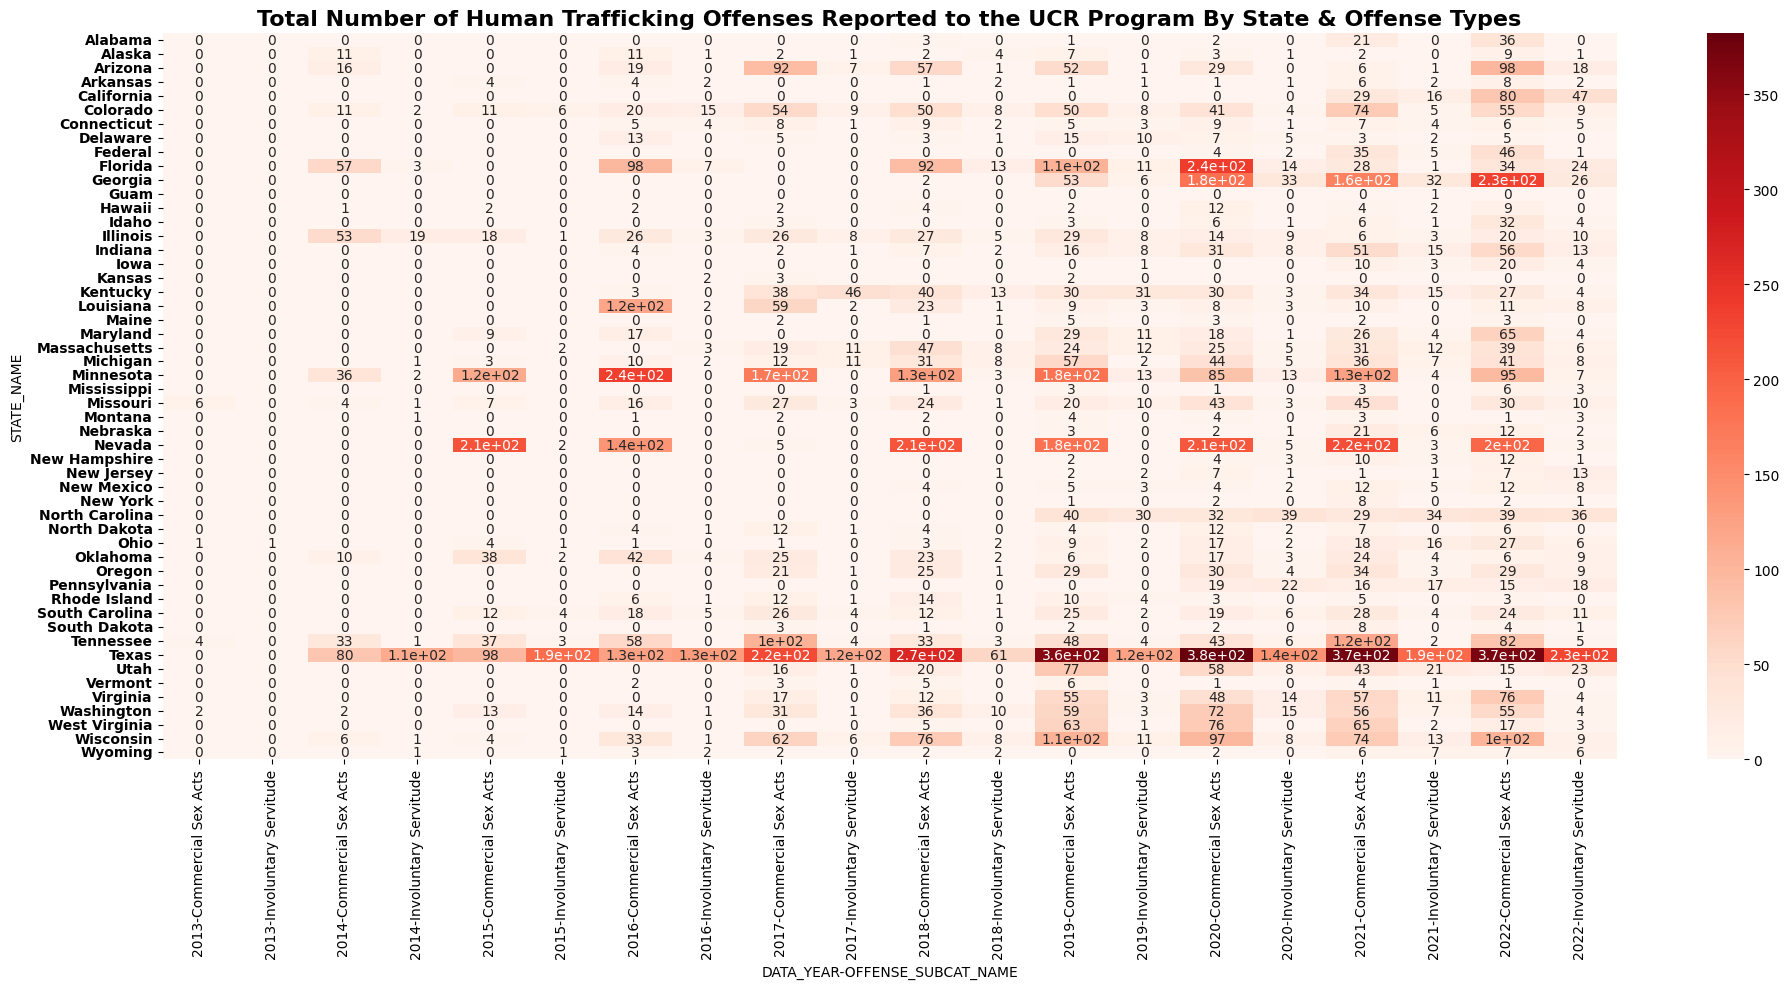

In [142]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot()
sns.heatmap(pd.pivot_table(data=cde_df, index='STATE_NAME', columns=['DATA_YEAR', 'OFFENSE_SUBCAT_NAME'], values='ACTUAL_COUNT', aggfunc='sum' ).replace({np.nan:0.0}), 
            annot=True, 
            cmap=ListedColormap(sns.color_palette(palette='Reds', n_colors=150)), 
            ax=ax)
ax.set_title("Total Number of Human Trafficking Offenses Reported to the UCR Program By State & Offense Types", fontweight='bold', fontsize=16) 
ax.set_yticklabels(ax.get_yticklabels(), fontweight='bold')

plt.tight_layout() 